<a href="https://colab.research.google.com/github/data-analysis-transcription-study/22_winter_study/blob/main/%5Bboostcourse%5D_%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EB%B6%84%EC%84%9D%EA%B3%BC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[박조은님 노트북](https://github.com/corazzon/KaggleStruggle/blob/master/kaggle-survey-2017/Kaggle-ML-DS-survey-2017-EDA-FAQ.ipynb)

## 데이터 사이언스는 어떤 사람들이 할까 (2017년 데이터)

In [ ]:
from google.colab import files

#files.upload() #kaggle API file upload

In [ ]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
question = pd.read_csv('schema.csv') # 설문 스키마가 있는 파일 
question.shape 

(290, 3)

In [ ]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [ ]:
mcq = pd.read_csv('multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape # 2469 명이 응답해줌 

(16716, 228)

In [ ]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [ ]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

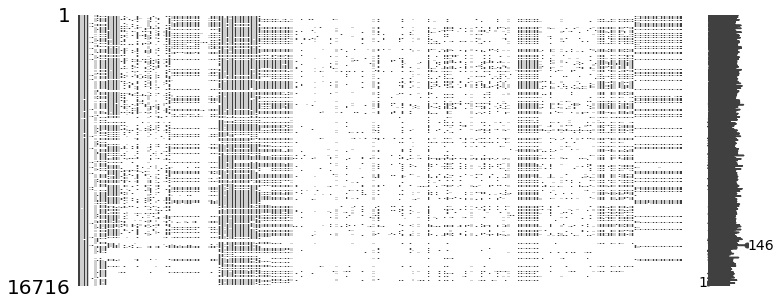

In [ ]:
# NaN 데이터들에 대한 시각화 
# NaN 데이터의 칼럼이 많아 아래 그래프만으로는 내용 파악이 어려움 
import missingno as msno
msno.matrix(mcq, figsize = (12,5))

# 16716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

## 설문통계 시각화

* 성별, 나이, 학력, 전공 등 

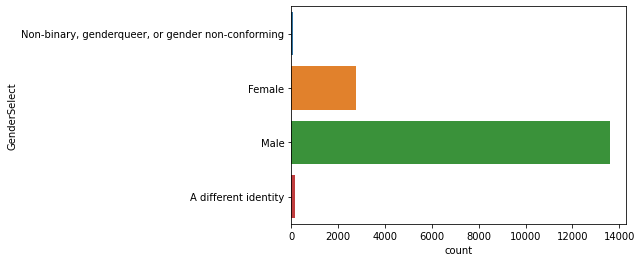

In [ ]:
# 1. 성별
sns.countplot(y='GenderSelect',data = mcq)

# 남성 응답자 비율이 훨씬 높은 편이다. 

In [ ]:
mcq['Country'].value_counts()

United States                  4197
India                          2704
Other                          1023
Russia                          578
United Kingdom                  535
People 's Republic of China     471
Brazil                          465
Germany                         460
France                          442
Canada                          440
Australia                       421
Spain                           320
Japan                           277
Taiwan                          254
Italy                           238
Netherlands                     205
Ukraine                         196
South Korea                     194
Poland                          184
Singapore                       184
Pakistan                        161
Turkey                          144
Indonesia                       131
Switzerland                     129
South Africa                    127
Mexico                          126
Colombia                        113
Iran                        

In [ ]:
# 2. 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts()) # 국가가 index 로 처리됨
con_df['국가'] = con_df.index # 따로 국가 칼럼을 만들어 인덱스로 지정해주고
con_df.columns = ['응답수','국가'] # 칼럼명을 다시 지정
con_df = con_df.reset_index().drop('index',axis=1)
# reset_index() : 0부터의 숫자 인덱스를 부여 -> 국가가 index로 처리된게 'index' 칼럼으로 생성되며 들어가므로
# index 칼럼을 drop
con_df.head(20)

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [ ]:
# 연령에 대한 정보를 본다. 
mcq['Age'].describe() # 평균나이 31세 

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

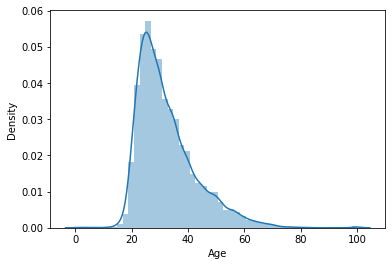

In [ ]:
sns.distplot(mcq[mcq['Age'] > 0]['Age']) 
# 31세 평균 데이터에 몰려있음 
# 나이가 들수록 점점 줄어듦 

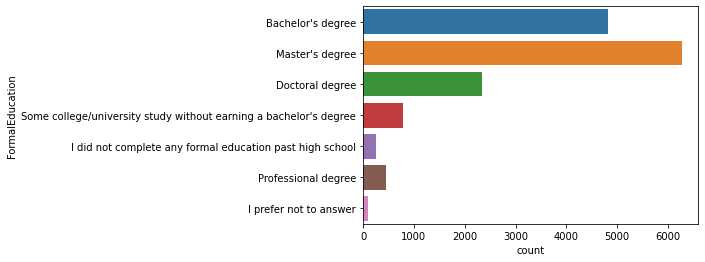

In [ ]:
# 3. 학력 
sns.countplot(y='FormalEducation',data=mcq)

# 석사, 박사 학위를 가진 사람이 더 많다. 

In [ ]:
# 4. 전공

mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
## normalize = True 로 0과 1 사이의 값으로 출력되게 하기 --> 전체 데이터에서 어느정도의 비율을 차지하는지 알 수 있다. 

## 병합 
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True)

mcq_major_df.columns = ['응답수','비율']

mcq_major_df # 컴공 전공이 34%로 가장 많음 

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


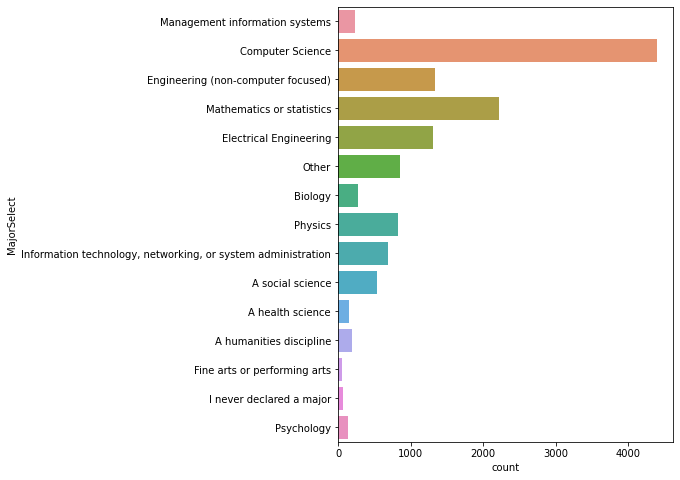

In [ ]:
# 재학중인 사람들의 전공 현황 
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

In [ ]:
# 5. 취업 여부 
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index = True, right_index = True) # 양쪽 인덱스 기준으로 병합
mcq_es_df.columns = ['응답수','비율']
mcq_es_df


,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


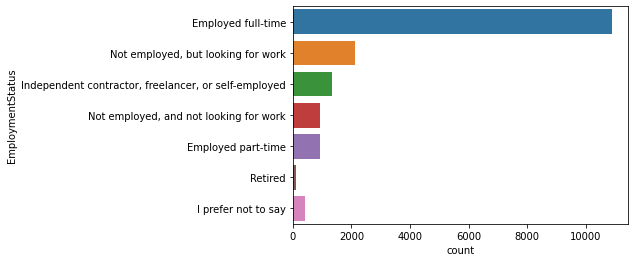

In [ ]:
sns.countplot(y='EmploymentStatus',data=mcq)

# 읃답자 대부분들이 65%가 풀타임으로 일하고 있음 

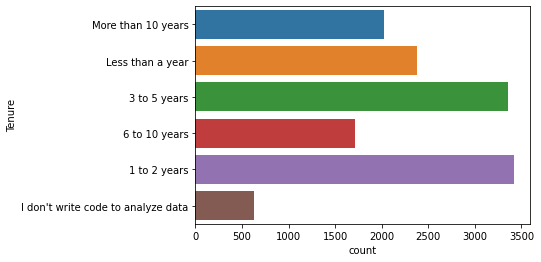

In [ ]:
# 6. 프로그래밍 경험 : 대부분 5년 미만, 1~2년 경험을 가진 사람들이 가장 많다. 
sns.countplot(y='Tenure',data=mcq)

**한국인 설문조사 응답자 데이터 시각화**

The number of interviewees in Korea: 194


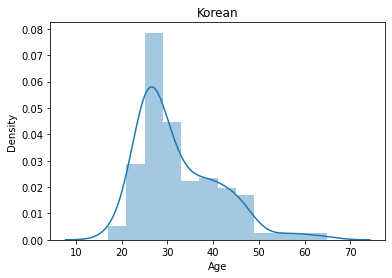

In [ ]:
# 우리나라 사람들에 대한 데이터만 뽑아서 보기 
korea = mcq.loc[(mcq['Country']=='South Korea')] # df

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

# 1. 나이 분포 
sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [ ]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

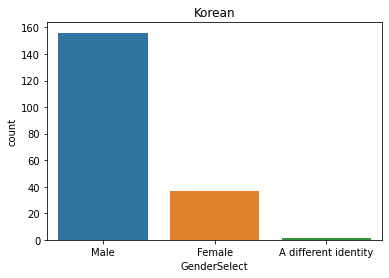

In [ ]:
# 2. 성별 분포 확인 
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

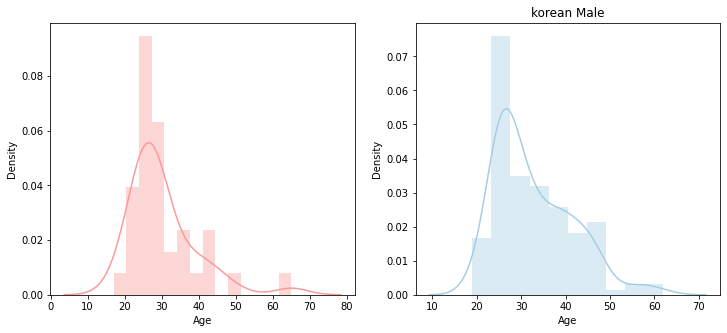

In [ ]:
# 3. 성별에 따른 나이 분포 살펴보기 
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist = False, color = sns.color_palette('Paired')[4], ax = ax1
             )

plt.title('korean female')

sns.distplot(
    korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist = False, color = sns.color_palette('Paired')[0], ax = ax2
)

plt.title('korean Male')

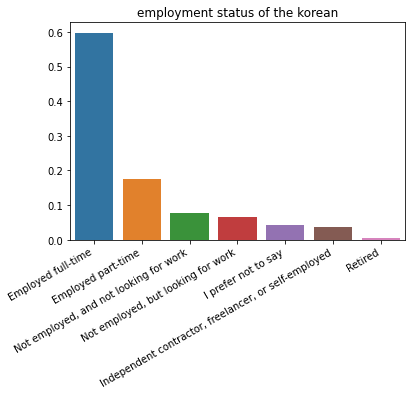

In [ ]:
# 4. 현재 구직중인지
sns.barplot(x = korea['EmploymentStatus'].unique(), y= korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation = 30, ha='right') # 글자를 잘 확인할 수 있도록 기울이기 
plt.title('employment status of the korean')
plt.ylabel(' ')
plt.show()

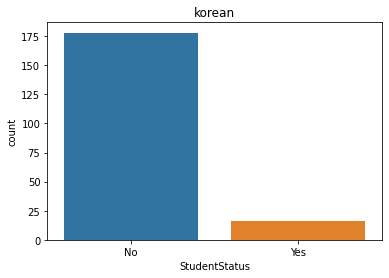

In [ ]:
# 5. 학생인지 
korea['StudentStatus'] = korea['StudentStatus'].fillna('No') # 결측치 채우기 
sns.countplot(x='StudentStatus',data = korea)
plt.title('korean')
plt.show()

## 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화

#### Q1. 파이썬과 R 중 어떤 언어를 배워야 하냐 

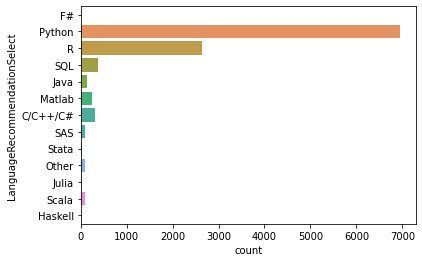

In [ ]:
# 1. 어떤 언어를 사용 
sns.countplot(y='LanguageRecommendationSelect',data = mcq)

# 범주가 많은 경우엔, y 로 지정하는게 좋고, 범주가 적을 경우엔 x 로 지정하는게 좋다. 

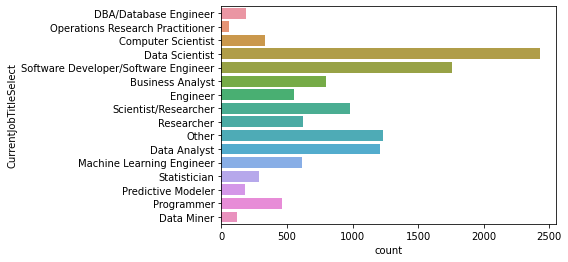

In [ ]:
# 2.현재 하고 있는 일은
sns.countplot(y=mcq['CurrentJobTitleSelect'])

(7737, 228)


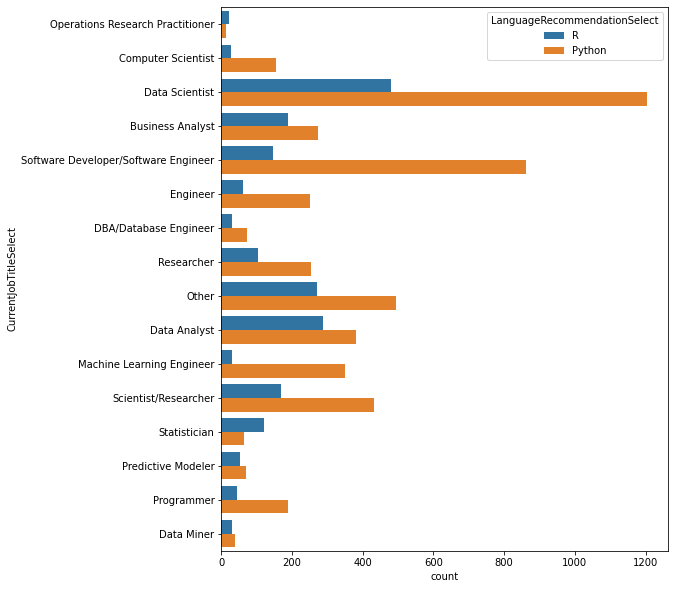

In [ ]:
# 3. 현재 하고 있는 일에 대한 응답을 해준 사람 중, 파이썬과 R 을 사용하는 비율 확인하기 

data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (mcq['LanguageRecommendationSelect'] == 'Python') |
           (mcq['LanguageRecommendationSelect'] == 'R')]

print(data.shape)

plt.figure(figsize = (8,10))
sns.countplot(y = 'CurrentJobTitleSelect', hue = 'LanguageRecommendationSelect', data = data) # hue : 범주별로 출력
# 데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 

#### Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까? 

In [ ]:
# 1. 데이터 사이언스 툴 
mcq_ml_tool_count = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index = True, right_index = True).head(20)
mcq_ml_tool_df.columns = ['응답수','비율']
mcq_ml_tool_df

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


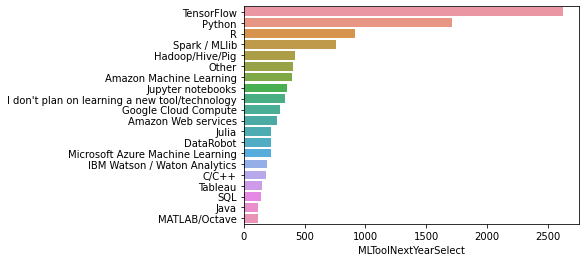

In [ ]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x = data)

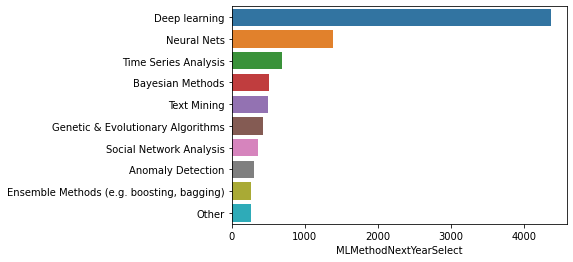

In [ ]:
# 2. 다음해에 주목할만한 데이터사이언스 방법론들 
data = mcq['MLMethodNextYearSelect'].value_counts().head(10)
sns.barplot(y=data.index, x=data)

#### Q3. 어디서 데이터사이언스를 배워야 할까?

In [ ]:
# 1. 학습 플랫폼 살펴보기 
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x : x.split(','))
# 복수응답이 가능했기 때문에, ',' 로 구분하여 리스트에 저장 
s = mcq.apply(lambda x : pd.Series(x['LearningPlatformSelect']), axis=1).stack().reset_index(level=1, drop=True)
# stack() : 하나씩 꺼내오기  
s

0        College/University
0               Conferences
0                  Podcasts
0                Trade book
1                    Kaggle
                ...        
16712    Stack Overflow Q&A
16712        YouTube Videos
16713                   nan
16714                   nan
16715                   nan
Length: 61904, dtype: object

In [ ]:
mcq['LearningPlatformSelect'][0]

['College/University', 'Conferences', 'Podcasts', 'Trade book']

In [ ]:
s.name = 'platform' # Series name 을 지정 (막대그래프 시각화에 x 축 label에 나타남)
s

0        College/University
0               Conferences
0                  Podcasts
0                Trade book
1                    Kaggle
                ...        
16712    Stack Overflow Q&A
16712        YouTube Videos
16713                   nan
16714                   nan
16715                   nan
Name: platform, Length: 61904, dtype: object

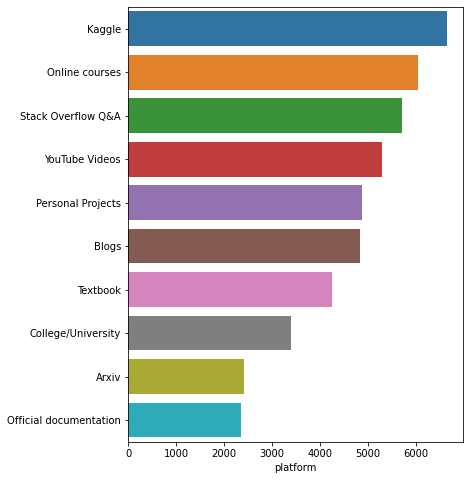

In [ ]:
plt.figure(figsize = (6,8))
data = s[s != 'nan'].value_counts().head(10)
sns.barplot(y=data.index , x=data)
# 그 러나 이 설문 조사를 실시한 곳이 Kaggle이기 때문에 응답이 편향되었을 수 있음
# 온라인 코스, 스택 오버플로 및 유튜브 (YouTube) 상위 5 대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [ ]:
# 설문 내용과 누구에게 물어봤는지를 찾아봄 
qc = question.loc[question['Column'].str.contains('LearningCategory')] # 어디서 배우는지 질문에 관련한 칼럼
## columns 칼럼에서 해당 문자열을 포함하고 있는 행 가져오기 
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [ ]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness')!= -1]
use_features # 어떤 플랫폼을 사용하는지 질문에 관한 칼럼 

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [ ]:
mcq['LearningPlatformUsefulnessYouTube']

0                    NaN
1                    NaN
2            Very useful
3                    NaN
4                    NaN
              ...       
16711                NaN
16712    Somewhat useful
16713                NaN
16714                NaN
16715                NaN
Name: LearningPlatformUsefulnessYouTube, Length: 16716, dtype: object

In [ ]:
# 2. 학습플랫폼과 유용함에 대한 연관성 살펴보기 
fdf = {}
for feature in use_features : 
  a = mcq[feature].value_counts()
  a = a/a.sum()
  fdf[feature[len('LearningPlatformUsefulness') : ]] = a 
  # dictionary 니까 Learning~ 글자 뒤에 있는 플랫폼 글자만 따와서 key 로 저장하고, value 는 a 로 저장 

In [ ]:
fdf

{'Arxiv': Very useful        0.550397
 Somewhat useful    0.434128
 Not Useful         0.015475
 Name: LearningPlatformUsefulnessArxiv, dtype: float64,
 'Blogs': Somewhat useful    0.504932
 Very useful        0.485624
 Not Useful         0.009444
 Name: LearningPlatformUsefulnessBlogs, dtype: float64,
 'College': Very useful        0.551652
 Somewhat useful    0.418279
 Not Useful         0.030068
 Name: LearningPlatformUsefulnessCollege, dtype: float64,
 'Communities': Somewhat useful    0.496497
 Very useful        0.489492
 Not Useful         0.014011
 Name: LearningPlatformUsefulnessCommunities, dtype: float64,
 'Company': Somewhat useful    0.511723
 Very useful        0.446483
 Not Useful         0.041794
 Name: LearningPlatformUsefulnessCompany, dtype: float64,
 'Conferences': Somewhat useful    0.598075
 Very useful        0.347388
 Not Useful         0.054537
 Name: LearningPlatformUsefulnessConferences, dtype: float64,
 'Courses': Very useful        0.700100
 Somewhat useful

In [ ]:
type(fdf['Arxiv'])

pandas.core.series.Series

In [ ]:
fdf['Arxiv'].index

Index(['Very useful', 'Somewhat useful', 'Not Useful'], dtype='object')

In [ ]:
fdf['Arxiv'].values

array([0.55039732, 0.43412798, 0.0154747 ])

In [ ]:
pd.DataFrame(fdf)

,Arxiv,Blogs,College,Company,Conferences,Friends,Kaggle,Newsletters,Communities,Documentation,Courses,Projects,Podcasts,SO,Textbook,TradeBook,Tutoring,YouTube
Not Useful,0.015475,0.009444,0.030068,0.041794,0.054537,0.032258,0.008507,0.051423,0.014011,0.018096,0.007844,0.008135,0.102142,0.011348,0.016503,0.027027,0.022440,0.019889
Somewhat useful,0.434128,0.504932,0.418279,0.511723,0.598075,0.489564,0.372323,0.629936,0.496497,0.459716,0.292056,0.247184,0.673806,0.362411,0.429562,0.486486,0.399018,0.498183
Very useful,0.550397,0.485624,0.551652,0.446483,0.347388,0.478178,0.619171,0.318641,0.489492,0.522189,0.700100,0.744681,0.224053,0.626241,0.553934,0.486486,0.578541,0.481928


In [ ]:
fdf = pd.DataFrame(fdf).transpose().sort_values('Very useful', ascending = False)
fdf

,Not Useful,Somewhat useful,Very useful
Projects,0.008135,0.247184,0.744681
Courses,0.007844,0.292056,0.700100
SO,0.011348,0.362411,0.626241
Kaggle,0.008507,0.372323,0.619171
Tutoring,0.022440,0.399018,0.578541
Textbook,0.016503,0.429562,0.553934
College,0.030068,0.418279,0.551652
Arxiv,0.015475,0.434128,0.550397
Documentation,0.018096,0.459716,0.522189
Communities,0.014011,0.496497,0.489492


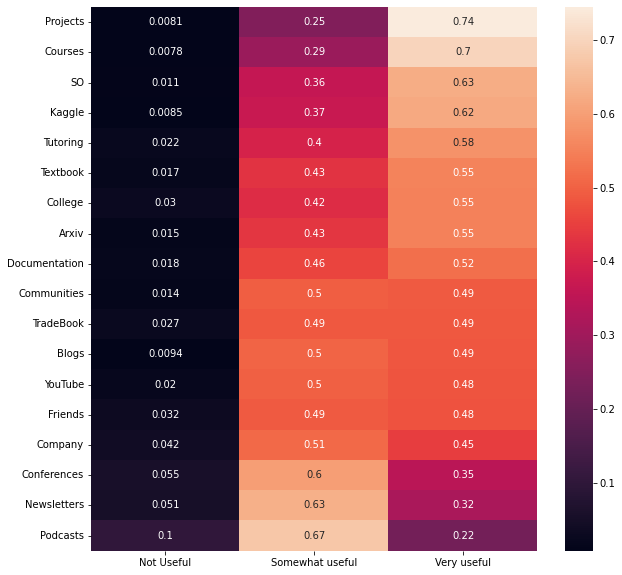

In [ ]:
# 학습 플랫폼들이 얼마나 유용한지 상관관계 그려보기 
plt.figure(figsize = (10,10))
sns.heatmap(fdf.sort_values('Very useful', ascending=False), annot = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

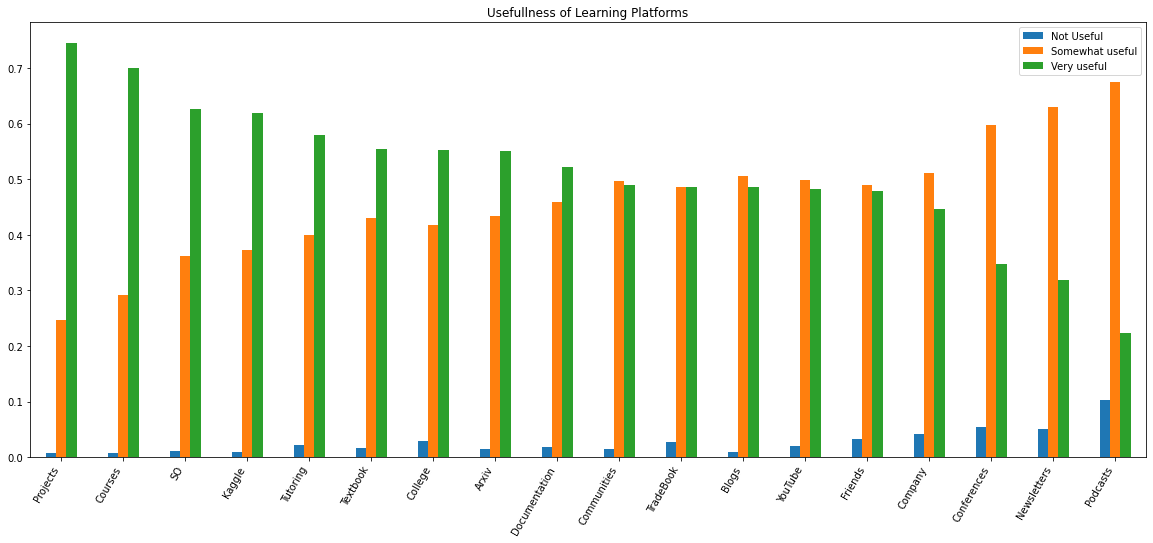

In [ ]:
# 유용함의 정도를 각 플랫폼별로 그룹화 해서 본다. 
fdf.plot( kind = 'bar', figsize = (20,8), title = "Usefullness of Learning Platforms")
plt.xticks(rotation=60, ha = 'right')
## 실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 응답했고 매우 유용하다고 표시했다. 

In [ ]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [ ]:
mcq['LearningCategorySelftTaught']

0         0.0
1        10.0
2        20.0
3        30.0
4        60.0
         ... 
16711    20.0
16712    10.0
16713     NaN
16714     NaN
16715     NaN
Name: LearningCategorySelftTaught, Length: 16716, dtype: float64

In [ ]:
cdf = {}
for feature in cat_features : 
  cdf[feature[len('LearningCategory') : ]] = mcq[feature].mean()

# 파이차트를 그리기 위해 평균값을 구해와서 담아준다. 
cdf

{'Kaggle': 5.531433795520342,
 'OnlineCourses': 27.375514246533598,
 'Other': 1.795939644111807,
 'SelftTaught': 33.36677092074147,
 'University': 16.98860691967688,
 'Work': 15.217593341468994}

In [ ]:
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

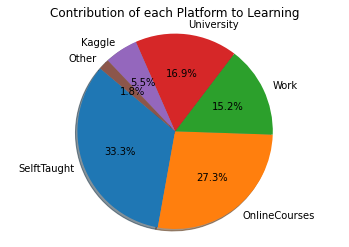

In [ ]:
plt.pie(cdf, labels=cdf.index,
        autopct = '%1.1f%%', shadow=True, startangle = 140 )

plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

#### Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?

In [ ]:
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [ ]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [ ]:
mcq['HardwarePersonalProjectsSelect'][100:200]

100                                                  NaN
101                               Basic laptop (Macbook)
102    Laptop or Workstation and local IT supported s...
103                               Basic laptop (Macbook)
104                               Basic laptop (Macbook)
                             ...                        
195                               Basic laptop (Macbook)
196                              Traditional Workstation
197                                                  NaN
198                                                  NaN
199                                                  NaN
Name: HardwarePersonalProjectsSelect, Length: 100, dtype: object

In [ ]:
mcq['HardwarePersonalProjectsSelect'] = mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x : x.split(','))
s = mcq.apply(lambda x : pd.Series(x['HardwarePersonalProjectsSelect']), axis = 1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'
s = s[s!='nan']

In [ ]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
GCE ...),669
Azure,669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


#### Q5.  데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?

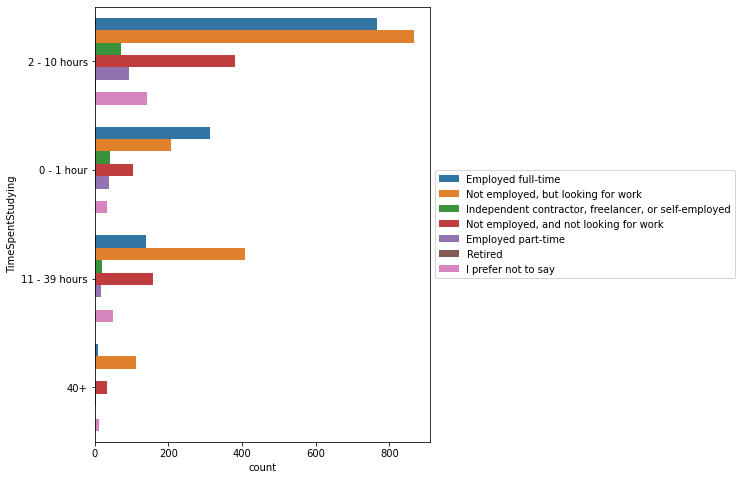

In [ ]:
plt.figure(figsize = (6,8))

# 현재 재직중인 상태의 여부에 따라 공부 시간을 시각화 
sns.countplot(y='TimeSpentStudying', data = mcq, hue = 'EmploymentStatus').legend(loc='center left', bbox_to_anchor =(1, 0.5) )

#### Q6. 블로그, 팟캐스트, 수업, 기타 등등 추천할만한 것이 있는지?

In [ ]:
mcq['BlogsPodcastsNewslettersSelect']  # 다중 응답 

0        Becoming a Data Scientist Podcast,Data Machina...
1        Becoming a Data Scientist Podcast,Siraj Raval ...
2        FastML Blog,No Free Hunch Blog,Talking Machine...
3                                           KDnuggets Blog
4        Data Machina Newsletter,Jack's Import AI Newsl...
                               ...                        
16711                                                  NaN
16712                                                  NaN
16713                                                  NaN
16714                                                  NaN
16715                                                  NaN
Name: BlogsPodcastsNewslettersSelect, Length: 16716, dtype: object

In [ ]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x : x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

**s 생성하는 과정 이해해보기**


* ```apply(함수, axis=0 또는 1)``` 
  * [참고](https://zephyrus1111.tistory.com/90)
  * axis = 1 은 행으로 적용 (디폴트는 1로 열 적용)

* 자료구조 stack 
  * 한쪽 끝에서만 자료를 넣거나 뺄 수 있는 구조 

* [stack 메서드](https://blog.naver.com/PostView.nhn?blogId=owl6615&logNo=221934149940&categoryNo=113&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)
  * (자료구조가 아님) stack() 함수는 열 인덱스를 행 인덱스로 변환함 


* reset_index 의 level 인수
  * [인덱스 지정](https://datascienceschool.net/01%20python/04.05%20%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84%20%EC%9D%B8%EB%8D%B1%EC%8A%A4%20%EC%A1%B0%EC%9E%91.html)
  * reset_index 에서 ``level = n, drop=True`` 은 지정된 인덱스 레벨을 제거시킴
  * [참고](https://ohgyun.com/768)

* 특정 칼럼을 인덱스로 직접 지정해주고 싶으면 set_index, 숫자 인덱스로 지정하거나, 다중 인덱스 중 특정 레벨 인덱스를 삭제하고 싶으면 reset_index [인덱스핸들링](https://yganalyst.github.io/data_handling/Pd_2/)

In [ ]:
mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1)[:3]

,0,1,2,3,4
0,Becoming a Data Scientist Podcast,Data Machina Newsletter,O'Reilly Data Newsletter,Partially Derivative Podcast,R Bloggers Blog Aggregator
1,Becoming a Data Scientist Podcast,Siraj Raval YouTube Channel,NaN,NaN,NaN
2,FastML Blog,No Free Hunch Blog,Talking Machines Podcast,NaN,NaN


In [ ]:
 mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack() 
 # 칼럼에 있던 0,1,2,3,4 칼럼 명이 로우 단위로 이동됨

0      0    Becoming a Data Scientist Podcast
       1              Data Machina Newsletter
       2             O'Reilly Data Newsletter
       3         Partially Derivative Podcast
       4           R Bloggers Blog Aggregator
                          ...                
16711  0                                  nan
16712  0                                  nan
16713  0                                  nan
16714  0                                  nan
16715  0                                  nan
Length: 26794, dtype: object

In [ ]:
s = mcq.apply(lambda x : pd.Series(x['BlogsPodcastsNewslettersSelect']), axis=1).stack().reset_index(level=1,drop=True)
s

0        Becoming a Data Scientist Podcast
0                  Data Machina Newsletter
0                 O'Reilly Data Newsletter
0             Partially Derivative Podcast
0               R Bloggers Blog Aggregator
                       ...                
16711                                  nan
16712                                  nan
16713                                  nan
16714                                  nan
16715                                  nan
Length: 26794, dtype: object

In [ ]:
s.name='platforms'
s = s[s!='nan'].value_counts().head(20)

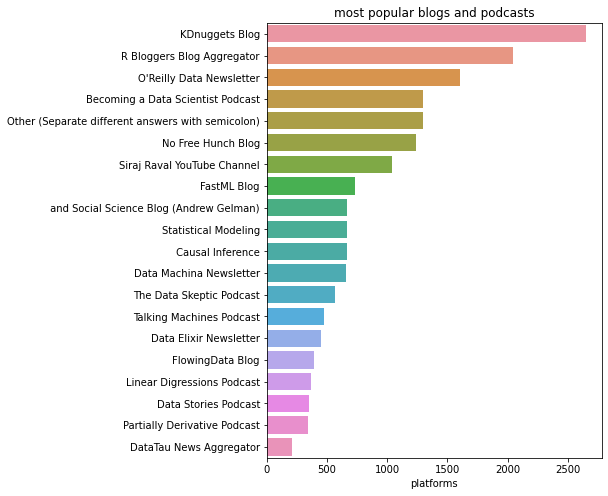

In [ ]:
plt.figure(figsize=(6,8))
plt.title('most popular blogs and podcasts')
sns.barplot(y=s.index, x=s)

In [ ]:
## 강의 플랫폼을 알아보자 
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x : x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [ ]:
t = mcq.apply(lambda x : pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1,drop=True)
t.name = 'courses'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: courses, dtype: object

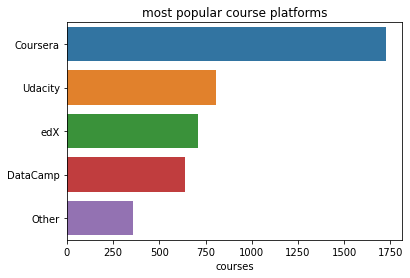

In [ ]:
t = t[t!='nan'].value_counts()
plt.title('most popular course platforms')
sns.barplot(y=t.index, x=t)

#### Q7. 데이터 과학자의 평균 급여는 얼마나 될까?

In [ ]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [ ]:
mcq['CompensationAmount']

0            NaN
1            NaN
2            NaN
3        250,000
4            NaN
          ...   
16711        NaN
16712        NaN
16713        NaN
16714        NaN
16715        NaN
Name: CompensationAmount, Length: 16716, dtype: object

In [ ]:
# 숫자 변환을 위해 문자 제거 
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')

# 환율 계산을 위한 정보 가져오기 
rates = pd.read_csv('conversionRates.csv').drop('Unnamed: 0', axis=1)
rates

,originCountry,exchangeRate
0,USD,1.000000
1,EUR,1.195826
2,INR,0.015620
3,GBP,1.324188
4,BRL,0.321350
...,...,...
81,SVC,0.114124
82,SZL,0.077002
83,UYU,0.034642
84,XAF,0.001823


**merge**
* [참고](https://yganalyst.github.io/data_handling/Pd_12/)

In [ ]:
salary = mcq[['CompensationAmount','CompensationCurrency','GenderSelect','Country','CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates, left_on = 'CompensationCurrency', right_on = 'originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
salary.head()


,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [ ]:
print('Maximum Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())
#가장 큰 수치는 여러 국가들의 GDP보다 크다고 한다. 가짜 응답이며, 평균급여는 USD $ 53,812 이다.

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

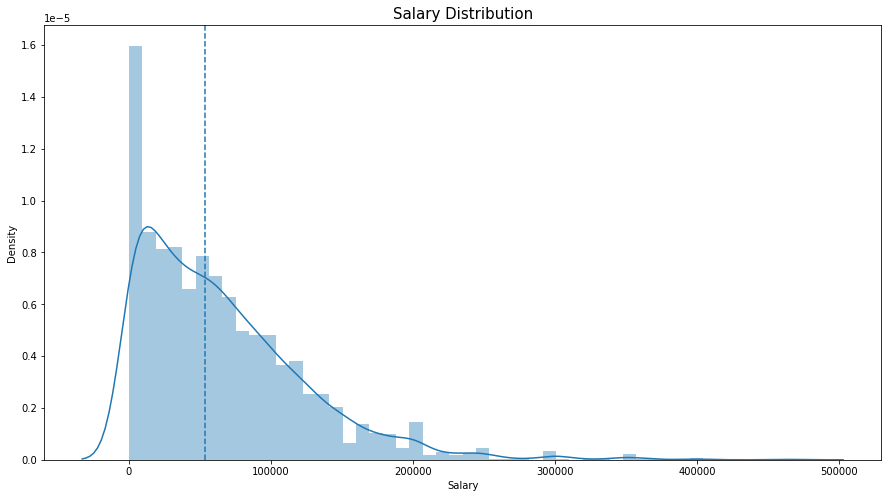

In [ ]:
plt.figure(figsize=(15,8))
salary = salary[salary['Salary']<500000] # 50만불 이하의 데이터만 그려보기
sns.distplot(salary['Salary'])

plt.axvline(salary['Salary'].median(), linestyle='dashed') # 중앙값 표기하기 

plt.title('Salary Distribution', size = 15)


* ``plt.axvline()`` : 수직선 그리기
* ``to_frame()`` : 시리즈를 데이터프레임으로 변환하는 메서드 


Text(0.5, 1.0, 'highest salary paying countries')

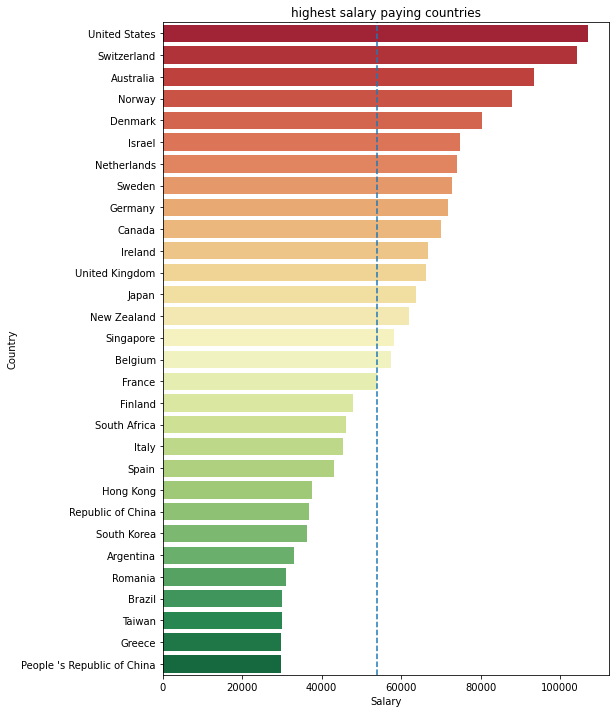

In [ ]:
# 국가별 데이터 과학자들의 급여 수준 (중앙값으로) 확인 
plt.figure(figsize=(8,12))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame() 

sns.barplot('Salary', sal_coun.index, data = sal_coun, palette = 'RdYlGn')

plt.axvline(salary['Salary'].median(),linestyle='dashed') # 전체 국가 평균값 표기 
plt.title('highest salary paying countries')

In [ ]:
sal_coun

,Salary
Country,
United States,107000.0000
Switzerland,104338.2000
Australia,93469.1150
Norway,87875.4000
Denmark,80365.0000
Israel,74852.5680
Netherlands,74141.2120
Sweden,72803.4480
Germany,71749.5600


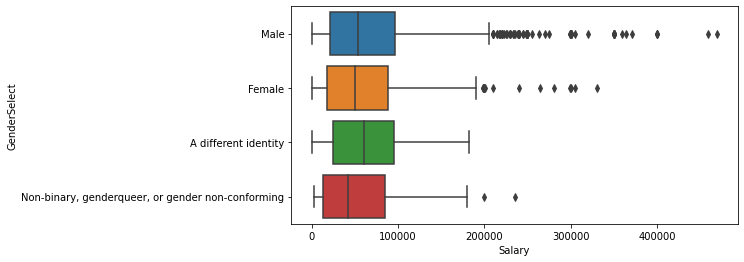

In [ ]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data = salary) #성별별 임금 격차 확인 
## 상위에 속하는 임금은 남성들이 훨씬 많은 것으로 파악됨 

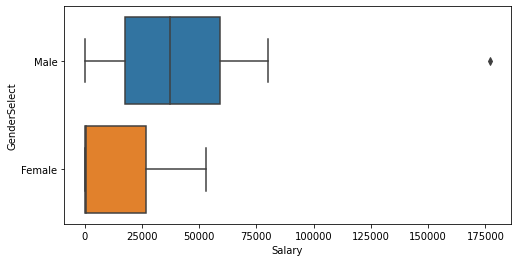

In [ ]:
s_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=s_korea)

# 여성 응답자가 3명뿐이라 일반화하기 어려움

In [ ]:
s_korea[s_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00
